## Matrix Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

```
Matrix plots allow us to plot data as color-encoded matrices. 

Before you start to plot a heatmap you should learn something about the concept of correlation. Because the numbers in each cell in a heatmap explain the correlation between two columns. 

Correlation is a statistical technique that determines how one variable changes with another variable. It gives us the degree of the relationship between the two variables. And the range of correlation is between -1 and 1. The numbers between -1 and 1 indicate the strength of the relationship. 

-1 : Indicates complete negative correlation

+1 : Indicates complete correlation

0 : Indicates no correlation.
```

### HeatMap

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [8]:
cars.groupby('origin').cylinders.value_counts().unstack()

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,63.0,3.0,4.0,NaN
japan,4.0,69.0,NaN,6.0,NaN
usa,NaN,72.0,NaN,74.0,103.0


In [11]:
origin_cyl = cars.groupby('origin').cylinders.value_counts().unstack().fillna(0)
origin_cyl

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


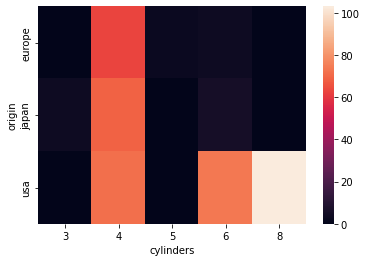

In [12]:
sns.heatmap(origin_cyl);

In [14]:
test_array = np.array([[1,2],[3,4]])
test_array

array([[1, 2],
       [3, 4]])

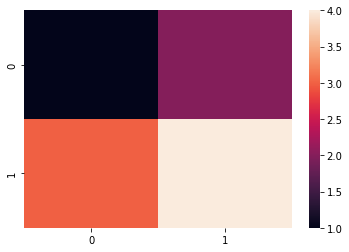

In [16]:
sns.heatmap(test_array);

In [19]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


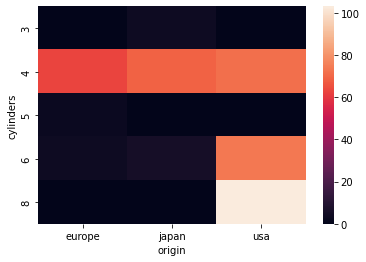

In [20]:
sns.heatmap(origin_cyl.T);

In [21]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


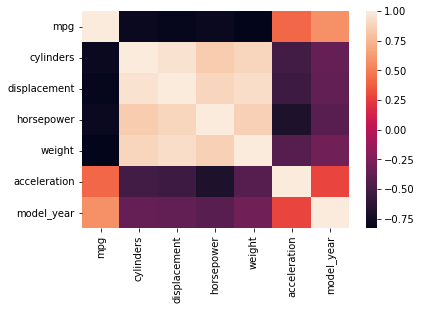

In [26]:
sns.heatmap(cars.corr());

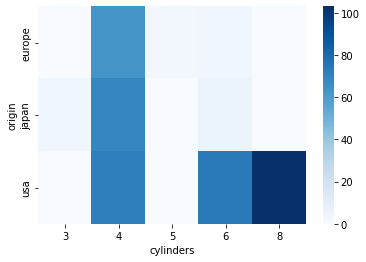

In [27]:
sns.heatmap(origin_cyl, cmap='Blues');

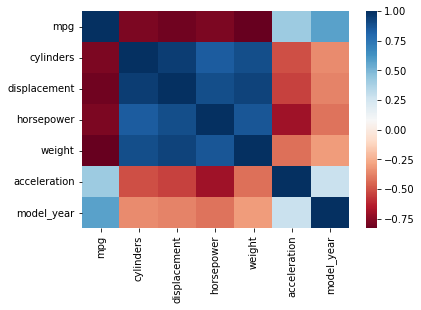

In [29]:
sns.heatmap(cars.corr(), cmap='RdBu');

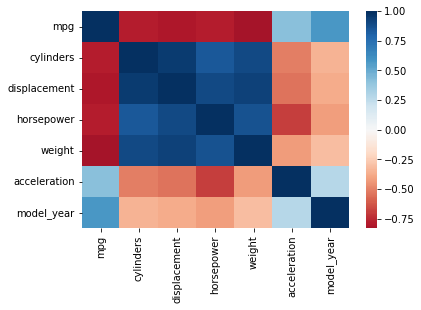

In [30]:
sns.heatmap(cars.corr(), cmap='RdBu', center=0);
# renk paletinin tam ortasina 0 getirmek istiyorsam center parametresini kullanabilirim

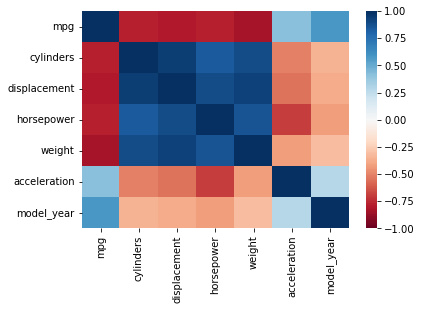

In [31]:
sns.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1);
# vmin ve vmax ile renk skalasinin hangi correlation degeri ile baslayacagini ve bitecegini belirliyoruz

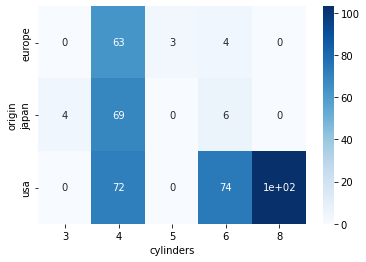

In [32]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

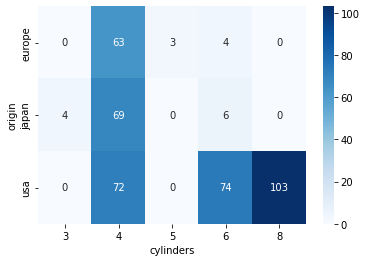

In [33]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f');
# garip bilimsel rakamlardan kurtulmak icin fmt parametresini kullanabilirim
# .0f ile noktadan sonra 0 tane decimal istiyorum demek

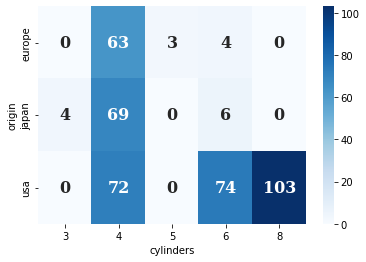

In [34]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f',
           annot_kws={'fontsize':16, 'fontweight':'bold', 'fontfamily':'serif'});

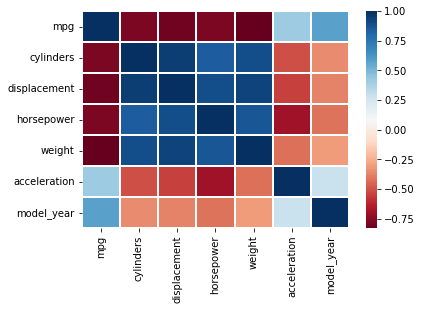

In [35]:
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1);

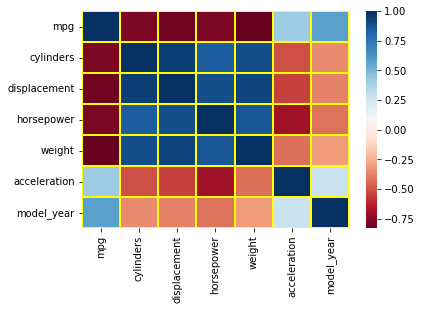

In [37]:
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1, linecolor='yellow');

In [38]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']

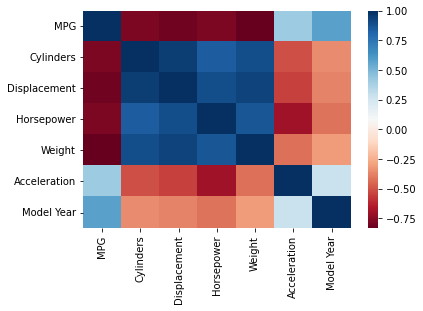

In [39]:
sns.heatmap(cars.corr(), cmap='RdBu', xticklabels=labels, yticklabels=labels);

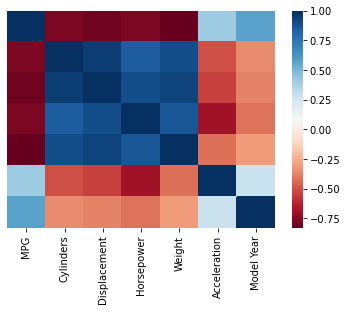

In [40]:
sns.heatmap(cars.corr(), cmap='RdBu', xticklabels=labels, yticklabels=False);

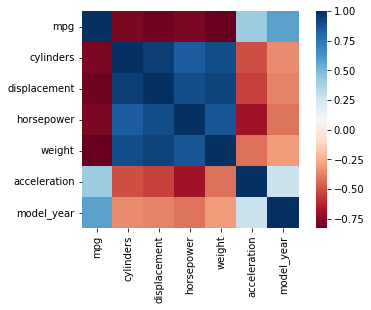

In [41]:
sns.heatmap(cars.corr(), cmap='RdBu', square=True);
# square=True herbir karenin tam bir kare olmasini saglar

### ClusterMap

In [42]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10,20,12,28],
    'Score': [15,20,16,25],
    'Street_Address': [11,24,18,9]
}

In [44]:
toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)
toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


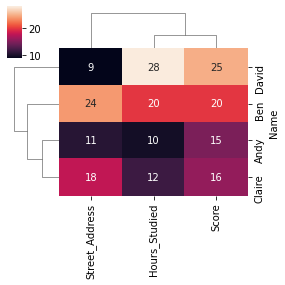

In [46]:
sns.clustermap(toy_data, figsize=(4,4), annot=True);
# figsize ile figurun buyuklugunu belirliyoruz
# annot ile herbir karenin icine dusen degeri yazdiriyoruz

In [47]:
# Seaborn dendograms'lari cizerken Hierarchical Agglomerative Clustering adinda bir metod kullaniyor

In [64]:
peng = sns.load_dataset('penguins').dropna()

In [65]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [66]:
peng.shape

(333, 7)

In [67]:
# Clustermap icin numerical degerlere ihtiyacimiz var

In [68]:
numerical_cols = peng.columns[2:6]
numerical_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

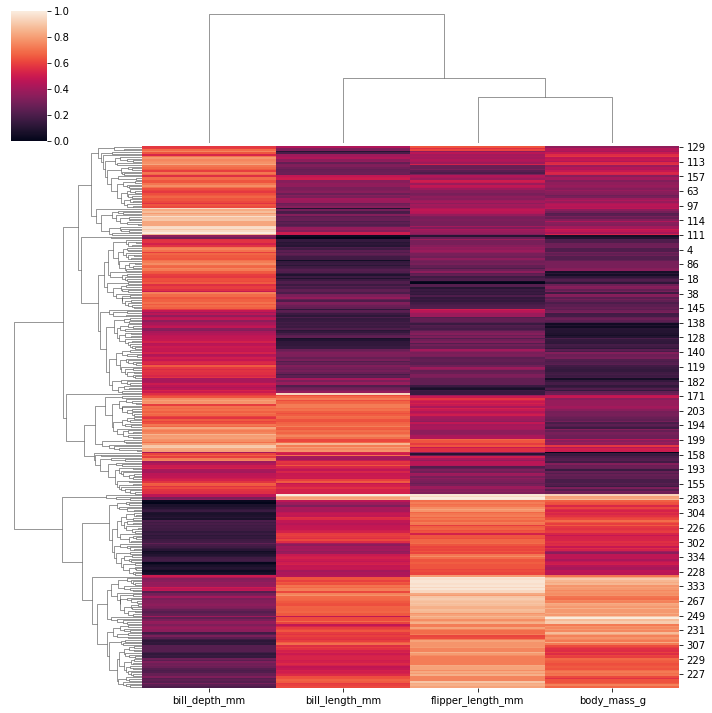

In [71]:
sns.clustermap(peng[numerical_cols], standard_scale=1);

In [72]:
species_colors=peng.species.map({'Adelie':'blue', 'Chinstrap':'red', 'Gentoo':'green'})

In [73]:
species_colors

0       blue
1       blue
2       blue
4       blue
5       blue
       ...  
338    green
340    green
341    green
342    green
343    green
Name: species, Length: 333, dtype: object

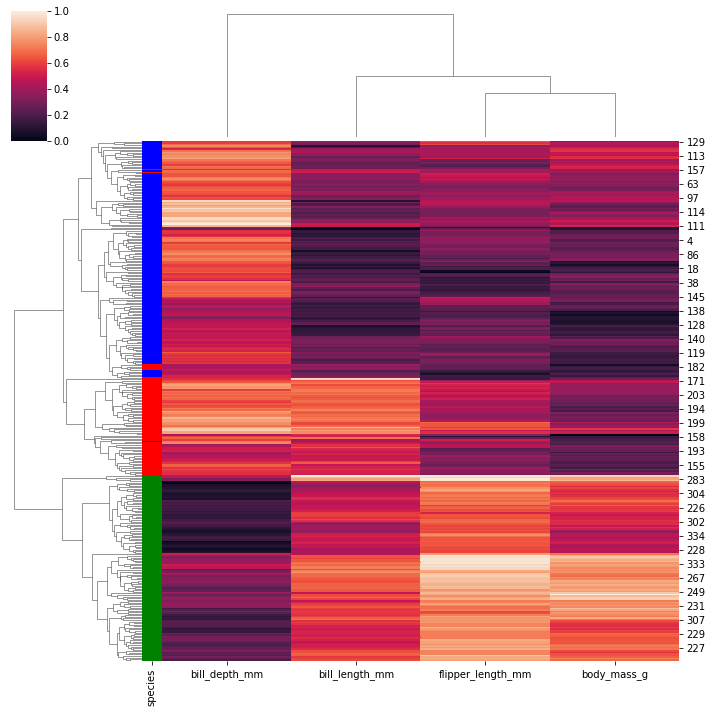

In [74]:
sns.clustermap(peng[numerical_cols], standard_scale=1, row_colors=species_colors);

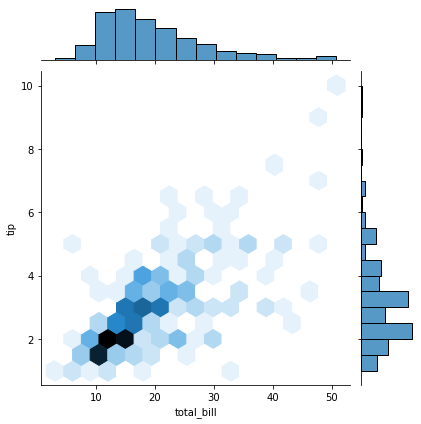

In [77]:
df = sns.load_dataset('tips')
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex');